In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Modify column names

data = pd.read_csv('Clean_Full.csv')

data = data.rename(columns={
    '20626': 'Area Code',

    '/2023-9-10/': 'Date',
    '18': 'Outages',
    '83.0': 'MaxTemp',
    '71.2': 'MinTemp',
    'Partly cloudy throughout the day with rain.': 'Description',
    'Rain, Partially cloudy': 'Conditions',
    '6.6': 'Windspeed',
    '24.2': 'WindGust',
    '0.0': 'Snowdepth',
    '0.383': 'Precipitation'
})

In [ ]:
# Convert Date column to datetime format

data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data

,Area Code,Date,Outages,MaxTemp,MinTemp,Description,Conditions,Windspeed,WindGust,Snowdepth,Precipitation
0,20735,2023-09-10,6,78.4,68.0,Partly cloudy throughout the day with rain.,"Rain, Partially cloudy",7.6,9.2,0.0,0.359
1,20854,2023-09-10,8,79.9,67.0,Partly cloudy throughout the day with rain.,"Rain, Partially cloudy",6.5,9.2,0.0,0.017
2,21013,2023-09-10,42,79.3,69.5,Partly cloudy throughout the day with rain.,"Rain, Partially cloudy",7.0,17.2,0.0,0.102
3,21042,2023-09-10,22,80.7,68.5,Partly cloudy throughout the day with rain in ...,"Rain, Partially cloudy",6.5,17.2,0.0,0.063
4,21043,2023-09-10,22,80.6,68.6,Partly cloudy throughout the day with rain in ...,"Rain, Partially cloudy",6.6,17.2,0.0,0.060
...,...,...,...,...,...,...,...,...,...,...,...
1073,21044,2023-09-14,25,78.8,62.1,Partly cloudy throughout the day.,Partially cloudy,9.5,25.4,0.0,0.000
1074,21133,2023-09-14,11,79.2,62.9,Partly cloudy throughout the day.,Partially cloudy,9.8,23.2,0.0,0.000
1075,20841,2023-09-13,9,80.5,66.0,Partly cloudy throughout the day with early mo...,"Rain, Partially cloudy",9.2,16.1,0.0,0.030
1076,20639,2023-09-10,39,79.7,70.6,Partly cloudy throughout the day with rain.,"Rain, Partially cloudy",7.5,11.4,0.0,0.363


# Sum of outages for 10 area codes and all conditions

In [ ]:
# Group area codes and find sum of outages per area code

grouped_area = data.groupby(['Area Code'])['Outages'].sum()

grouped_data = grouped_area.sort_values(ascending=False)

sorted_data = grouped_area.sort_values(ascending=False)

top_10 = sorted_data.head(10)

top_10_df = pd.DataFrame(top_10)

top_10_df

,Outages
Area Code,
21093,26804
21133,19122
21122,11634
21013,7947
21163,7813
21209,5706
21131,4664
21208,4292
21136,2703


In [ ]:
# Group conditions and find sum of outages per weather condition

grouped_condition = data.groupby(['Conditions'])['Outages'].sum()
grouped_condition = pd.DataFrame(grouped_condition)
sorted_grouped_condition = grouped_condition.sort_values(by='Outages', ascending=False)
sorted_grouped_condition

,Outages
Conditions,
"Rain, Partially cloudy",137590
Clear,7779
Partially cloudy,5781
Rain,1667


In [ ]:
# Show weather condition count per area code

grouped_area_conditions = data.groupby(['Area Code', 'Conditions']).size().reset_index(name='Count')

grouped_area_conditions

,Area Code,Conditions,Count
0,20601,"Rain, Partially cloudy",8
1,20602,"Rain, Partially cloudy",2
2,20603,Clear,1
3,20603,"Rain, Partially cloudy",5
4,20607,Clear,1
...,...,...,...
301,21912,"Rain, Partially cloudy",2
302,21914,"Rain, Partially cloudy",1
303,21915,"Rain, Partially cloudy",7
304,21921,Rain,1


In [ ]:
# Show "Rain, Partially cloudy" count per area code

rain_partial_cloudy = data[data['Conditions'].isin(['Rain, Partially cloudy'])]

area_condition_counts = rain_partial_cloudy.groupby('Area Code').size().reset_index(name='Condition Count')

sorted_area_codes = area_condition_counts.sort_values(by='Condition Count', ascending=False)

# Correlation between outages and numerical features

In [ ]:
# Calculate correlation coefficient between power outages and selected features

weather_columns = ['MaxTemp', 'Windspeed', 'WindGust', 'Precipitation']

for column in weather_columns:
    correlation_coefficient = data['Outages'].corr(data[column])
    print(f"Correlation coefficient between Outages and {column}: {correlation_coefficient}")


Correlation coefficient between Outages and MaxTemp: 0.19743970356175064
Correlation coefficient between Outages and Windspeed: -0.06344965377215149
Correlation coefficient between Outages and WindGust: 0.2872650876349719
Correlation coefficient between Outages and Precipitation: 0.06318732078322371



# Prediction models and accuracy scores

In [ ]:
# Predict where outages will occur

features = ['MaxTemp', 'MinTemp', 'Windspeed', 'WindGust', 'Snowdepth', 'Precipitation', 'Conditions']
target = 'Outages'

X = data[features]
y = data[target]

label_encoder = LabelEncoder()
X['Conditions'] = label_encoder.fit_transform(X['Conditions'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


<ipython-input-10-8154e6141446>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Conditions'] = label_encoder.fit_transform(X['Conditions'])


Accuracy: 0.018518518518518517
Classification Report:
              precision    recall  f1-score   support

           5       0.14      0.20      0.17        15
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         3
          21       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Calculate accuracy scores for prediction model

features = ['MaxTemp', 'MinTemp', 'Windspeed', 'WindGust', 'Snowdepth', 'Precipitation', 'Conditions']
target = 'Area Code'

X = data[features]
y = data[target]

label_encoder = LabelEncoder()
X['Conditions'] = label_encoder.fit_transform(X['Conditions'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


<ipython-input-11-1243801bb2c0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Conditions'] = label_encoder.fit_transform(X['Conditions'])


Accuracy: 0.7268518518518519
Classification Report:
              precision    recall  f1-score   support

       20601       0.00      0.00      0.00         0
       20613       1.00      0.50      0.67         2
       20616       0.00      0.00      0.00         0
       20618       1.00      1.00      1.00         1
       20619       0.00      0.00      0.00         1
       20622       1.00      1.00      1.00         1
       20639       0.00      0.00      0.00         2
       20646       0.50      1.00      0.67         1
       20653       0.00      0.00      0.00         0
       20657       1.00      1.00      1.00         1
       20659       1.00      1.00      1.00         2
       20686       0.00      0.00      0.00         1
       20689       0.00      0.00      0.00         0
       20716       0.00      0.00      0.00         2
       20736       0.00      0.00      0.00         0
       20737       1.00      0.50      0.67         2
       20740       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# K means clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


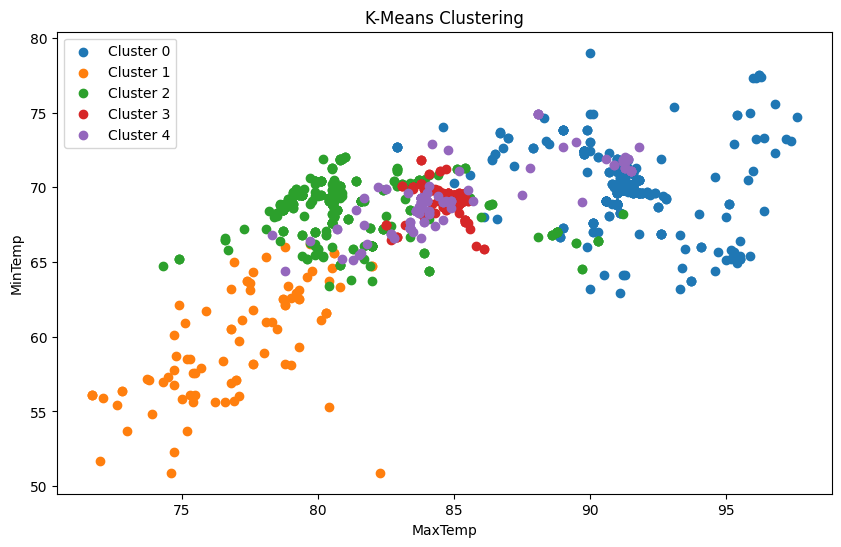

      Area Code  Cluster Labels
0         20735               2
1         20854               2
2         21013               2
3         21042               2
4         21043               2
...         ...             ...
1073      21044               1
1074      21133               1
1075      20841               2
1076      20639               2
1077      21154               2

[1078 rows x 2 columns]


In [22]:
# Create a DataFrame with each row and the cluster it belongs to

numerical_columns = ['MaxTemp', 'MinTemp', 'Windspeed', 'WindGust', 'Snowdepth', 'Precipitation']

numerical_data = data[numerical_columns]

scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

k= 5

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(numerical_data_scaled)

data['Cluster Labels'] = kmeans.labels_

data[['Area Code', 'Cluster Labels']]



# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for cluster in range(k):
    cluster_data = data[data['Cluster Labels'] == cluster]
    ax.scatter(cluster_data['MaxTemp'], cluster_data['MinTemp'], label=f'Cluster {cluster}')

ax.set_xlabel('MaxTemp')
ax.set_ylabel('MinTemp')
ax.set_title('K-Means Clustering')
ax.legend()
plt.show()

# Display DataFrame with Area Code and Cluster Labels
print(data[['Area Code', 'Cluster Labels']])

In [ ]:
# Print the area codes in each cluster

unique_clusters = data['Cluster Labels'].unique()

for cluster_label in unique_clusters:

    cluster_data = data[data['Cluster Labels'] == cluster_label]

    area_codes = cluster_data['Area Code'].tolist()

    print(f"Cluster {cluster_label}: Area Codes - {area_codes}")

Cluster 2: Area Codes - [20735, 20854, 21013, 21042, 21043, 21048, 21060, 21075, 21093, 21111, 21131, 21132, 21133, 21136, 21152, 21154, 21161, 21163, 21208, 21223, 21228, 21244, 21286, 21409, 21738, 21740, 21053, 21771, 21794, 21797, 21911, 21921, 20616, 20882, 21042, 21202, 21771, 21050, 21078, 21161, 21206, 21208, 21133, 21401, 21794, 21911, 21212, 21215, 21701, 21795, 20722, 20737, 20740, 20743, 20747, 21048, 21133, 21208, 21230, 21722, 20879, 20910, 21042, 21061, 21084, 21131, 21136, 21154, 21163, 21223, 21771, 21701, 21795, 20876, 20902, 20910, 21001, 21013, 21014, 21030, 21037, 21157, 21042, 21057, 21060, 21084, 21157, 21286, 21409, 21701, 21795, 21087, 21093, 21104, 21111, 21122, 21131, 21133, 21136, 20782, 20879, 21013, 21131, 21161, 21208, 21409, 21620, 21638, 21701, 21701, 21795, 21154, 21204, 21207, 21208, 21218, 21220, 21223, 21613, 21795, 21617, 21713, 21795, 21740, 21742, 21754, 21770, 21784, 21804, 21901, 21911, 21921, 21613, 21208, 21795, 20737, 21014, 21795, 21638, 21

In [ ]:
# Display 10 area codes per cluster

cluster_area_counts = data.groupby(['Cluster Labels', 'Area Code']).size().reset_index(name='Count')

cluster_area_counts = cluster_area_counts.sort_values(by=['Cluster Labels', 'Count'], ascending=[True, False])

unique_clusters = cluster_area_counts['Cluster Labels'].unique()
for cluster_label in unique_clusters:
    cluster_data = cluster_area_counts[cluster_area_counts['Cluster Labels'] == cluster_label].head(10)
    top_area_codes = cluster_data['Area Code'].tolist()
    print(f"Cluster {cluster_label}: Top 10 Area Codes - {top_area_codes}")


Cluster 0: Top 10 Area Codes - [21122, 21133, 21136, 21208, 21163, 21093, 21244, 21013, 21082, 21207]
Cluster 1: Top 10 Area Codes - [20874, 21701, 21773, 20646, 21044, 21702, 20603, 20715, 20716, 20772]
Cluster 2: Top 10 Area Codes - [21111, 20910, 21131, 21161, 21795, 21208, 21154, 21093, 21132, 21157]
Cluster 3: Top 10 Area Codes - [21015, 21093, 21104, 21122, 21133, 21163, 21013, 21050, 21082, 21084]
Cluster 4: Top 10 Area Codes - [21206, 20601, 21087, 21234, 21215, 21401, 20613, 20781, 21214, 20770]


# Graphs/plots

<Figure size 1000x600 with 0 Axes>

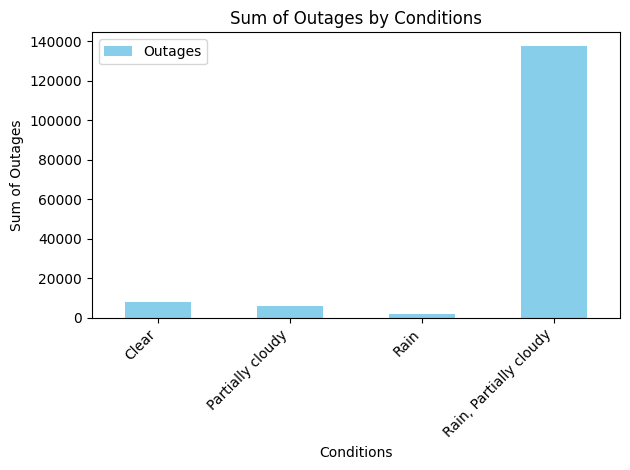

In [ ]:
# Create bar chart showing sum of outages per weather condition

grouped_conditions = data.groupby('Conditions')['Outages'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
grouped_condition.plot(kind='bar', color='skyblue')
plt.title('Sum of Outages by Conditions')
plt.xlabel('Conditions')
plt.ylabel('Sum of Outages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


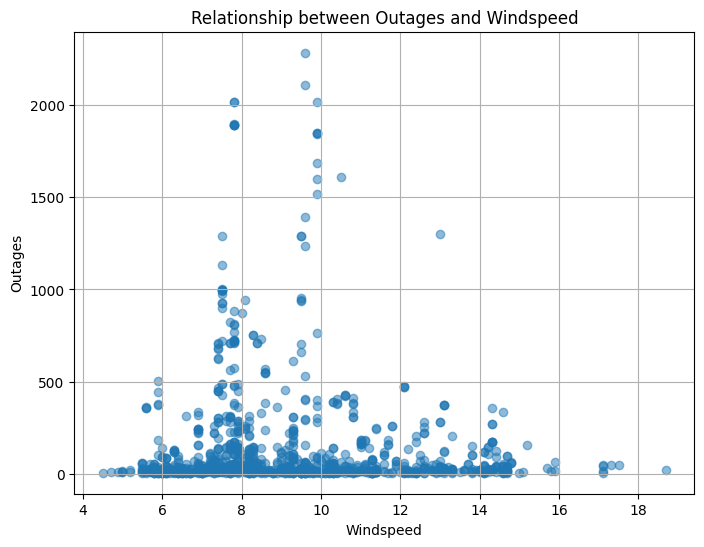

In [ ]:
# Create a scatter plot showing relationship between outages and wind speed

plt.figure(figsize=(8, 6))
plt.scatter(data['Windspeed'], data['Outages'], alpha=0.5)
plt.title('Relationship between Outages and Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Outages')
plt.grid(True)
plt.show()


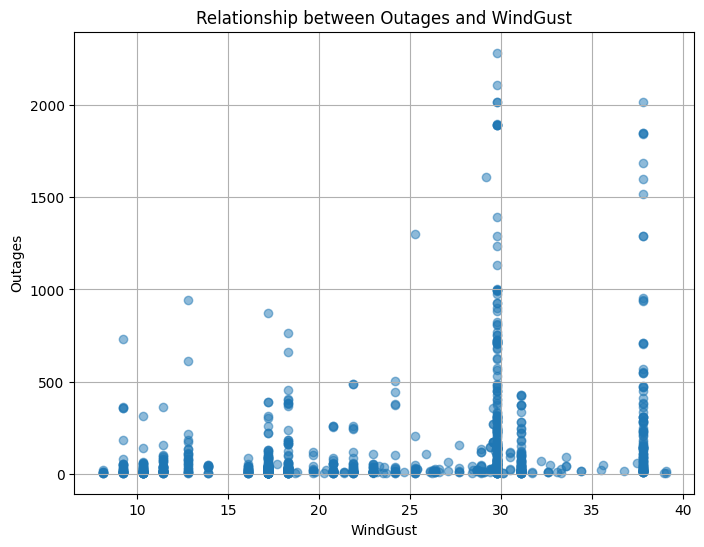

In [ ]:
# Create a scatter plot showing relationship between outages and wind gust

plt.figure(figsize=(8, 6))
plt.scatter(data['WindGust'], data['Outages'], alpha=0.5)
plt.title('Relationship between Outages and WindGust')
plt.xlabel('WindGust')
plt.ylabel('Outages')
plt.grid(True)
plt.show()

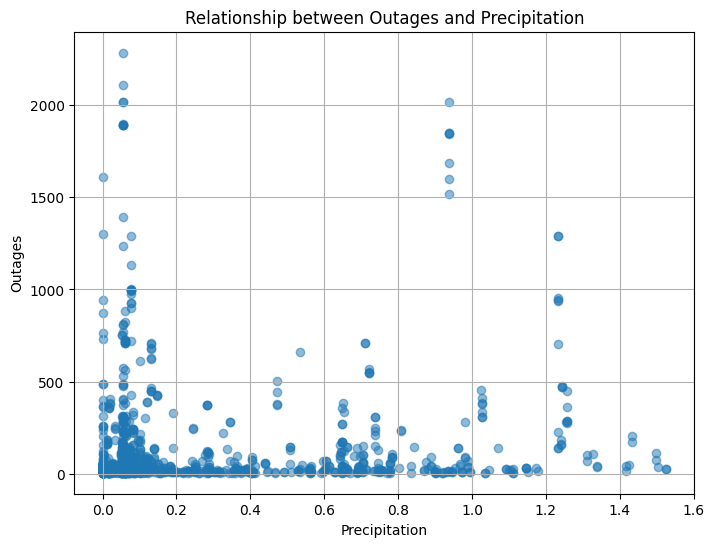

In [ ]:
# Create a scatter plot showing relationship between outages and precipitation

plt.figure(figsize=(8, 6))
plt.scatter(data['Precipitation'], data['Outages'], alpha=0.5)
plt.title('Relationship between Outages and Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Outages')
plt.grid(True)
plt.show()

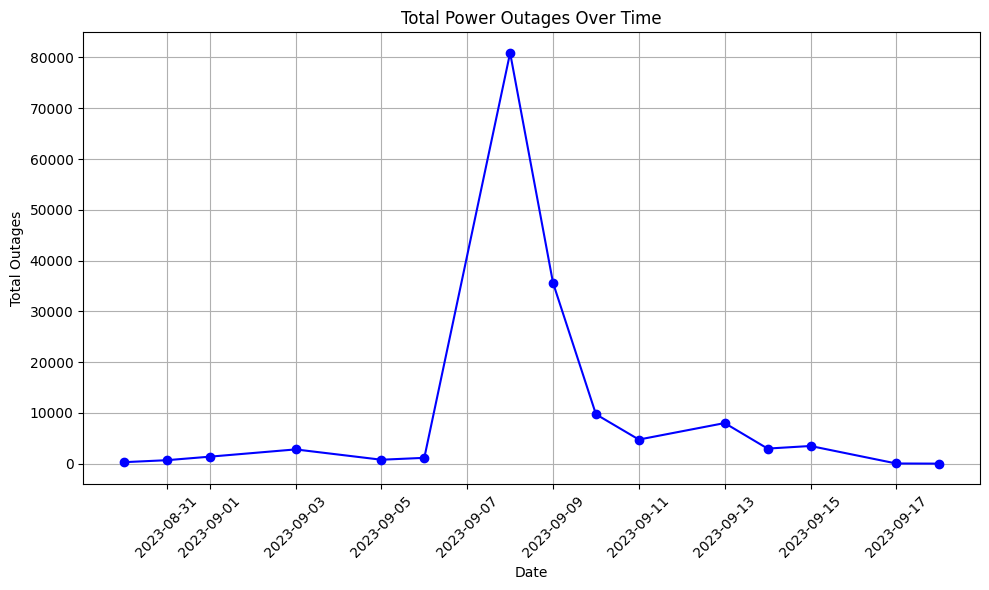

In [ ]:
# Create line plot showing the number of outages over time

grouped_date = data.groupby(['Date'])['Outages'].sum()
pd.DataFrame(grouped_date)

plt.figure(figsize=(10, 6))
plt.plot(grouped_date.index, grouped_date, marker='o', linestyle='-', color='b')
plt.title('Total Power Outages Over Time')
plt.xlabel('Date')
plt.ylabel('Total Outages')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
